# Lab1 Fashion MNIST #
## Realised By: Safa CHARFI ##

# Import some important libaraies :

In [ ]:
# Import necessary libraries for data manipulation, visualization, and deep learning
import pandas as pd                               # Data manipulation and analysis library
import numpy as np                                # Library for numerical computations
import matplotlib.pyplot as plt                   # Library for creating visualizations
import seaborn as sns                             # Statistical data visualization library
import tensorflow as tf                            # Open-source library for machine learning and deep learning
from tensorflow.keras import models, layers      # Import models and layers for building neural networks
from tensorflow.keras.callbacks import EarlyStopping # Callback to stop training early to prevent overfitting

# Remove warnings:

In [ ]:
import warnings
warnings.simplefilter("ignore")

# Display all columns and rows in the output :

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)


# Load our data :

In [ ]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Create a DataFrame for the training data by reshaping the images and adding labels
train_data = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))  # Reshape images into a flat array
train_data.insert(0, 'label', y_train)                             # Insert label column at the beginning
train_data.columns = ['label'] + [f'pixel{i}' for i in range(784)]  # Rename columns

# Create a DataFrame for the test data in a similar manner
test_data = pd.DataFrame(x_test.reshape(x_test.shape[0], -1))      # Reshape test images
test_data.insert(0, 'label', y_test)                                # Insert label column
test_data.columns = ['label'] + [f'pixel{i}' for i in range(784)]  # Rename columns

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Let's have imformation about the dataset:

In [ ]:
print(f"Shape Of Train Data :{train_data.shape}")
print(f"Shape Of Test Data :{test_data.shape}")

Shape Of Train Data :(60000, 785)
Shape Of Test Data :(10000, 785)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel783
dtypes: uint8(785)
memory usage: 44.9 MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel783
dtypes: uint8(785)
memory usage: 7.5 MB


In [ ]:
print(f"maximum value : {np.max(train_data)}\n minimum value : {np.min(train_data)}")

maximum value : 255
 minimum value : 0


### Separate features and labels

In [ ]:
train_images = train_data.iloc[:, 1:].values
train_labels = train_data.iloc[:, 0].values

test_images = test_data.iloc[:, 1:].values
test_labels = test_data.iloc[:, 0].values

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


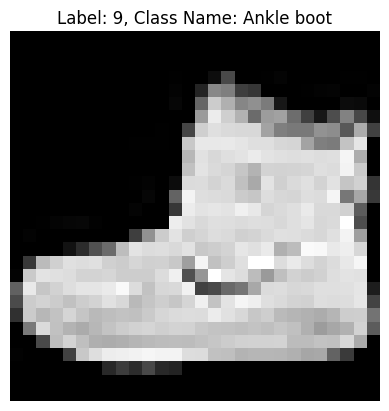

In [ ]:
# Reshape the first image in the train_images dataset to 28x28 pixels
image = train_images[0].reshape(28, 28)

# Display the image in grayscale using matplotlib
plt.imshow(image, cmap='gray')

# Add a title showing the label and class name of the image
plt.title(f"Label: {train_labels[0]}, Class Name: {class_names[train_labels[0]]}")

# Turn off the axis for a cleaner visualization
plt.axis("off")

# Show the image
plt.show()


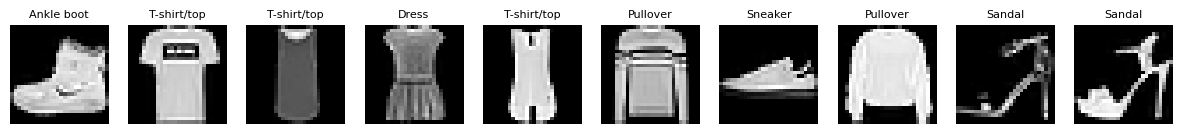

In [ ]:
# Set the number of images to display
num_images = 10

# Create a figure with 10 subplots, arranged in 1 row
fig, axes = plt.subplots(1, num_images, figsize=(15, 15))

# Loop through the first 10 images
for i in range(num_images):
    # Reshape each image to 28x28 pixels
    image = train_images[i].reshape(28, 28)

    # Display each image in grayscale
    axes[i].imshow(image, cmap='gray')

    # Set the title of each subplot to the class name of the corresponding image
    axes[i].set_title(f"{class_names[train_labels[i]]}", fontsize=8)

    # Turn off the axis for a cleaner display
    axes[i].axis('off')

# Show the figure
plt.show()


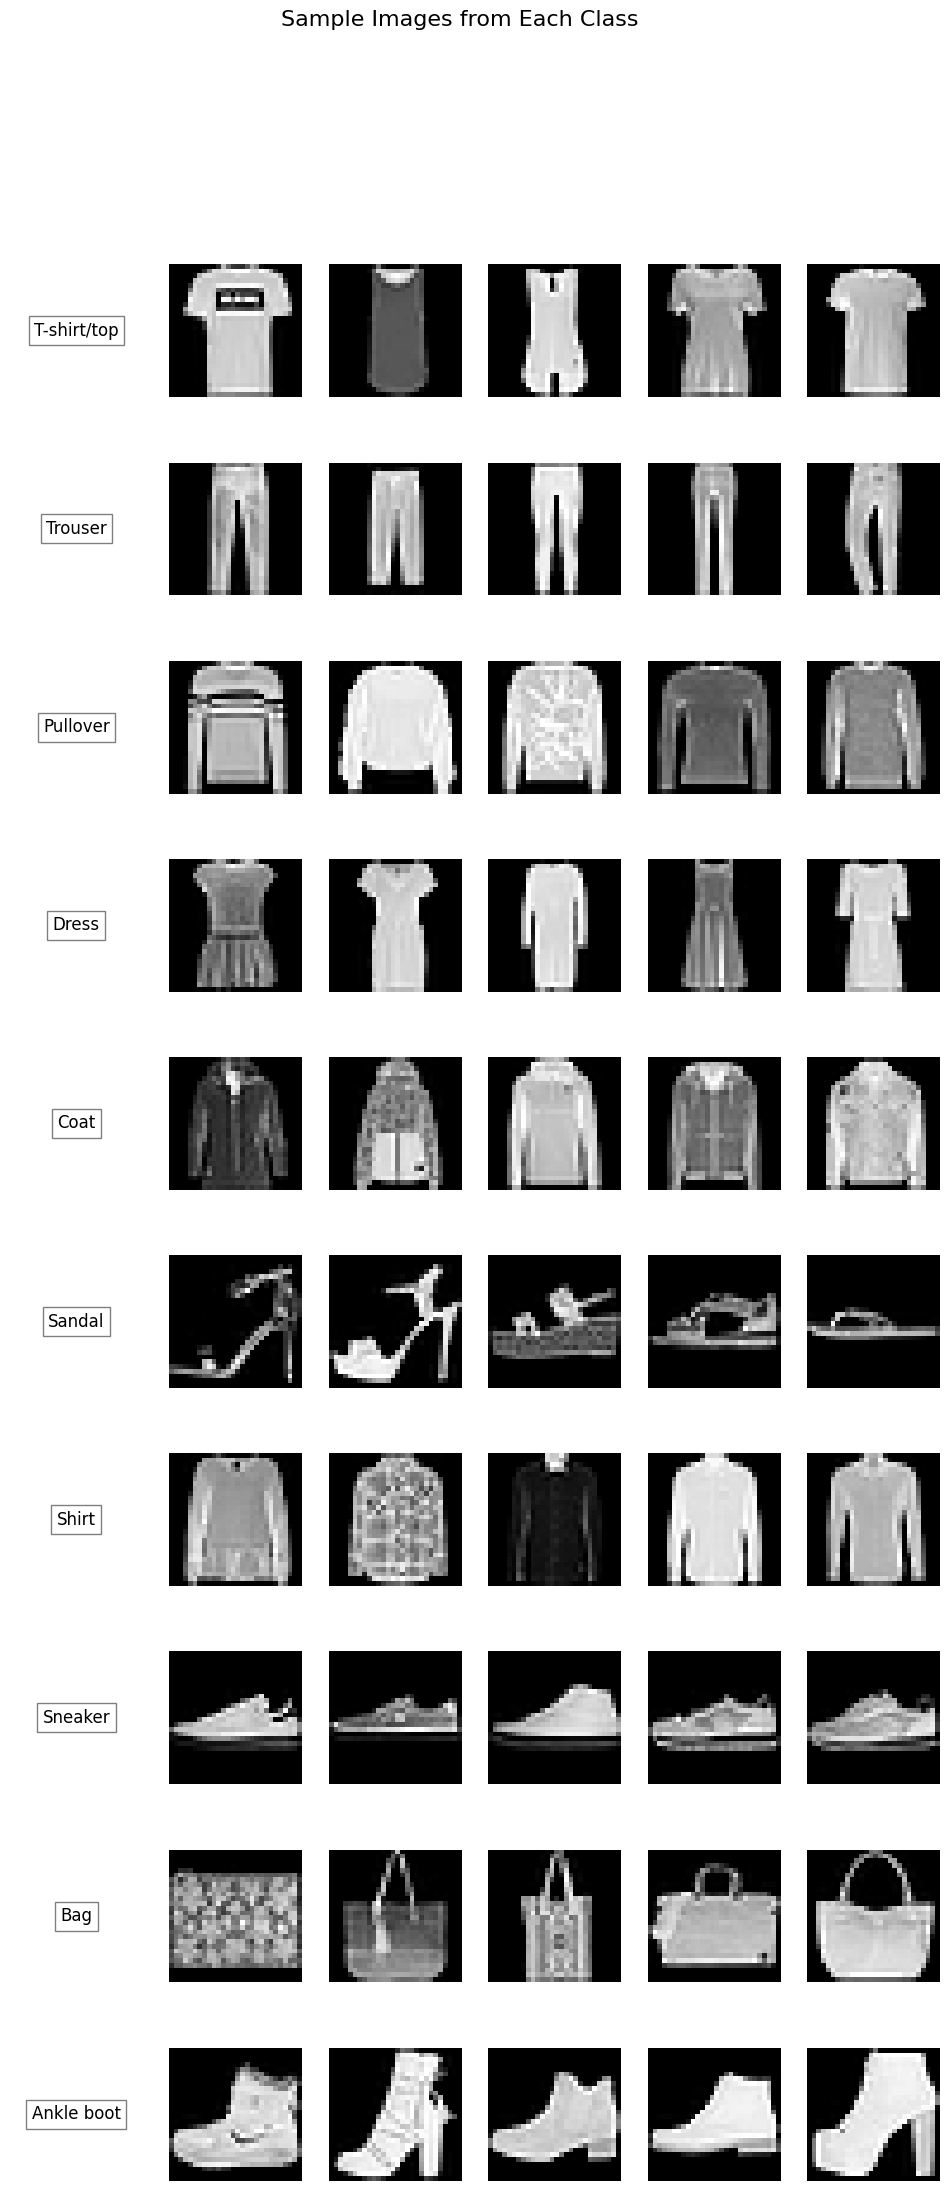

In [ ]:
# Get the total number of classes
num_classes = len(class_names)

# Set the number of images to display per class
images_per_class = 5

# Create a figure with a grid of subplots, where each row corresponds to a class
# The grid has num_classes rows and (images_per_class + 1) columns
fig, axes = plt.subplots(num_classes, images_per_class + 1, figsize=(12, num_classes * 2.5))

# Loop through each class and display the class name and sample images
for i, class_name in enumerate(class_names):
    # Display the class name in the first column of each row
    axes[i, 0].text(0.5, 0.5, class_name, ha='center', va='center', fontsize=12,
                    bbox=dict(facecolor='white', alpha=0.5))
    axes[i, 0].axis('off')  # Turn off the axis for the class name cell

    # Get the indices of images that belong to the current class
    class_indices = [index for index, label in enumerate(train_labels) if label == i]

    # Display 5 sample images for each class
    for j in range(images_per_class):
        # Reshape the image to 28x28 pixels
        image = train_images[class_indices[j]].reshape(28, 28)

        # Show the image in grayscale
        axes[i, j + 1].imshow(image, cmap='gray')

        # Turn off the axis for a cleaner display
        axes[i, j + 1].axis('off')

# Adjust the space between the subplots for better visualization
plt.subplots_adjust(wspace=0.2, hspace=0.4)

# Add a title to the figure
plt.suptitle('Sample Images from Each Class', fontsize=16)

# Show the plot
plt.show()


In [ ]:
# Convert the numeric labels in train_labels to their corresponding class names
train_labels_named = [class_names[label] for label in train_labels]

# Count the occurrences of each class name using Pandas
class_counts = pd.Series(train_labels_named).value_counts()

# Convert the counts into a DataFrame and reset the index to get a tabular structure
class_counts_df = class_counts.reset_index()

# Rename the columns of the DataFrame for clarity
class_counts_df.columns = ['Class', 'Count']

# Display the DataFrame showing the class names and their corresponding image counts
class_counts_df


,Class,Count
0,Ankle boot,6000
1,T-shirt/top,6000
2,Dress,6000
3,Pullover,6000
4,Sneaker,6000
5,Sandal,6000
6,Trouser,6000
7,Shirt,6000
8,Coat,6000
9,Bag,6000


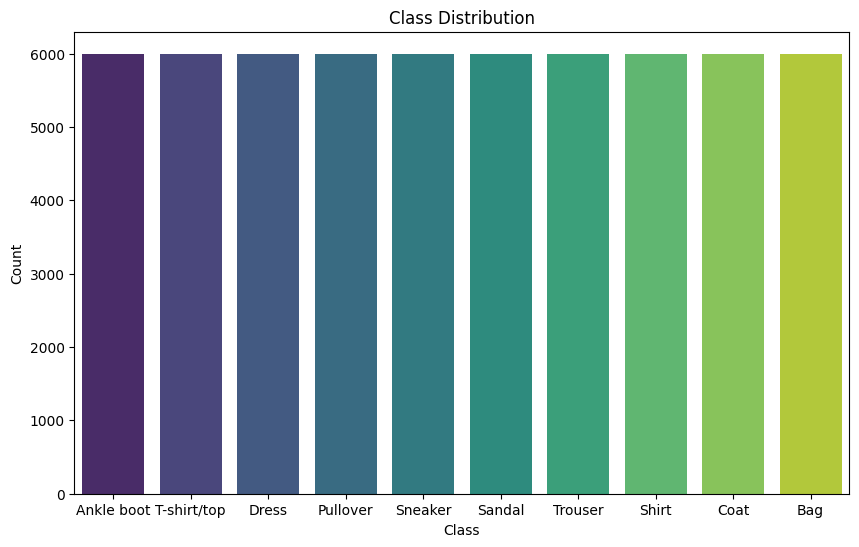

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the class distribution
# 'Class' on the x-axis, 'Count' on the y-axis, using the class_counts_df DataFrame
sns.barplot(x='Class', y='Count', data=class_counts_df, palette='viridis')

# Add a title to the plot
plt.title('Class Distribution')

# Label the x-axis as 'Class'
plt.xlabel('Class')

# Label the y-axis as 'Count'
plt.ylabel('Count')

# Display the plot
plt.show()


* All classes are balanced

In [ ]:
# Import the train_test_split function from sklearn to split the dataset
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
# 80% of the data goes to the training set, 20% to the validation set
x_train, x_valid, y_train, y_valid = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)


In [ ]:
# Assign the predefined test set directly to x_test and y_test
x_test = test_images
y_test = test_labels

# Build Fully Connected Network :

In [ ]:
# Build a sequential model
model1 = models.Sequential([
    # Rescale the input pixel values from [0, 255] to [0, 1] and specify the input shape
    layers.Rescaling(1./255, input_shape=(784,)),

    # First hidden layer with 128 neurons and ReLU activation function
    layers.Dense(128, activation='relu'),

    # Second hidden layer with 64 neurons and ReLU activation function
    layers.Dense(64, activation='relu'),

    # Third hidden layer with 32 neurons and ReLU activation function
    layers.Dense(32, activation='relu'),

    # Output layer with 10 neurons (one for each class) and softmax activation
    layers.Dense(10, activation='softmax')
])

# Print the summary of the model to see the layers and parameters
model1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model with the Adam optimizer, sparse categorical cross-entropy loss,
# and accuracy as the evaluation metric
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
# Set up early stopping to monitor validation loss, stop training if it doesn't improve
# for 5 consecutive epochs, and restore the best model weights
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model using the training data, validate on the validation set
history = model1.fit(
    x_train, y_train,                    # Training data
    validation_data=(x_valid, y_valid),   # Validation data
    epochs=30,                            # Maximum number of epochs
    batch_size=32,                        # Number of samples per batch
    callbacks=[early_stopping]            # Use early stopping to prevent overfitting
)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7490 - loss: 0.7164 - val_accuracy: 0.8621 - val_loss: 0.3919
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8576 - loss: 0.3927 - val_accuracy: 0.8559 - val_loss: 0.3903
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8714 - loss: 0.3425 - val_accuracy: 0.8638 - val_loss: 0.3732
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8839 - loss: 0.3205 - val_accuracy: 0.8777 - val_loss: 0.3418
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8876 - loss: 0.3050 - val_accuracy: 0.8775 - val_loss: 0.3400
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8951 - loss: 0.2819 - val_accuracy: 0.8660 - val_loss: 0.3661
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8985 - loss: 0.2711 - val_accuracy: 0.8827 - val_loss: 0.3402
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9024 - loss: 0.2617 - 

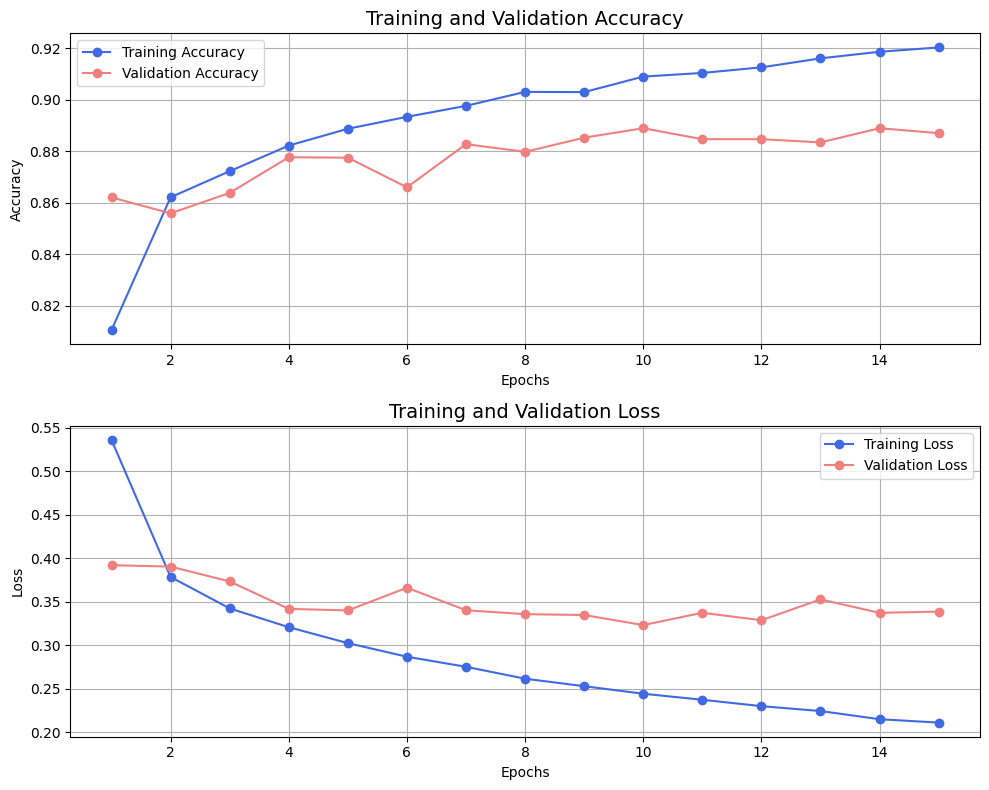

In [ ]:
# Function to plot training and validation accuracy and loss over epochs
def plot_history(history):
    # Retrieve accuracy and loss from the history object for both training and validation
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create a figure with two subplots: one for accuracy and one for loss
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Get the range of epochs to plot on the x-axis
    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    ax[0].plot(epochs, acc, color='royalblue', linestyle='-', marker='o', label='Training Accuracy')
    ax[0].plot(epochs, val_acc, color='lightcoral', linestyle='-', marker='o', label='Validation Accuracy')
    ax[0].set_title('Training and Validation Accuracy', fontsize=14)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc='best')
    ax[0].grid(True)

    # Plot training and validation loss
    ax[1].plot(epochs, loss, color='royalblue', linestyle='-', marker='o', label='Training Loss')
    ax[1].plot(epochs, val_loss, color='lightcoral', linestyle='-', marker='o', label='Validation Loss')
    ax[1].set_title('Training and Validation Loss', fontsize=14)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc='best')
    ax[1].grid(True)

    # Adjust layout for better spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

# Call the function to plot the training history
plot_history(history)

In [ ]:
# Generate predictions for the test set using the trained model
predictions = model1.predict(x_test)

# Get the predicted class for each test sample by taking the index of the maximum predicted probability
predicted_classes = predictions.argmax(axis=1)

# Create a DataFrame to compare the true labels with the predicted labels
df_predictions = pd.DataFrame({
    'True Label': y_test,              # True labels from the test set
    'Predicted Label': predicted_classes  # Predicted labels from the model
})

# Display the first 10 rows of the DataFrame to view the comparison
df_predictions.head(10)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,True Label,Predicted Label
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
5,1,1
6,4,4
7,6,6
8,5,5
9,7,7


# Building CNN Model :

In [ ]:
# Reshape the training, validation, and test images from 1D (784) to 3D (28x28x1)
# -1 allows flexibility in reshaping the number of images automatically
x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_valid_reshaped = x_valid.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test.reshape(-1, 28, 28, 1)


In [ ]:
# Build a CNN model using the Sequential API
model2 = models.Sequential([
    # Rescale the input pixel values to be in the range [0, 1], specifying input shape as (28, 28, 1)
    layers.Rescaling(1./255, input_shape=(28, 28, 1)),

    # First convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu'),

    # First max pooling layer with 2x2 pool size to reduce spatial dimensions
    layers.MaxPooling2D((2, 2)),

    # Dropout layer to prevent overfitting by randomly dropping 25% of neurons
    layers.Dropout(0.25),

    # Second convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Second max pooling layer with 2x2 pool size
    layers.MaxPooling2D((2, 2)),

    # Dropout layer to prevent overfitting
    layers.Dropout(0.25),

    # Flatten the output from 2D to 1D to feed into the fully connected layers
    layers.Flatten(),

    # Fully connected dense layer with 128 neurons and ReLU activation
    layers.Dense(128, activation='relu'),

    # Dropout layer to prevent overfitting by randomly dropping 50% of neurons
    layers.Dropout(0.5),

    # Output layer with 10 neurons (one for each class) and softmax activation for classification
    layers.Dense(10, activation='softmax')
])

# Print a summary of the model architecture
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the CNN model with the Adam optimizer, sparse categorical cross-entropy loss function,
# and accuracy as the evaluation metric
model2.compile(
    optimizer='adam',                      # Adam optimizer to adjust the learning rate
    loss='sparse_categorical_crossentropy', # Loss function for multi-class classification
    metrics=['accuracy']                   # Track accuracy during training
)


In [ ]:
# Set up early stopping to monitor validation loss, stop training if no improvement for 5 epochs,
# and restore the best model weights
early_stopping = EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss during training
    patience=5,                  # Stop training if no improvement for 5 consecutive epochs
    restore_best_weights=True    # Restore the best model weights observed during training
)

# Train the CNN model with the reshaped training data, validate on the reshaped validation set
history = model2.fit(
    x_train_reshaped, y_train,                     # Training data
    validation_data=(x_valid_reshaped, y_valid),   # Validation data
    epochs=50,                                     # Maximum number of epochs
    batch_size=64,                                 # Number of samples per batch
    callbacks=[early_stopping]                     # Use early stopping to prevent overfitting
)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6390 - loss: 0.9792 - val_accuracy: 0.8356 - val_loss: 0.4689
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8124 - loss: 0.5090 - val_accuracy: 0.8613 - val_loss: 0.3724
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8419 - loss: 0.4357 - val_accuracy: 0.8711 - val_loss: 0.3422
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8564 - loss: 0.3925 - val_accuracy: 0.8850 - val_loss: 0.3134
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8673 - loss: 0.3727 - val_accuracy: 0.8866 - val_loss: 0.3076
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8768 - loss: 0.3371 - val_accuracy: 0.8957 - val_loss: 0.2830
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8795 - loss: 0.3320 - val_accuracy: 0.8968 - val_loss: 0.2767
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8827 - loss: 0.3247 - val_accuracy: 0.

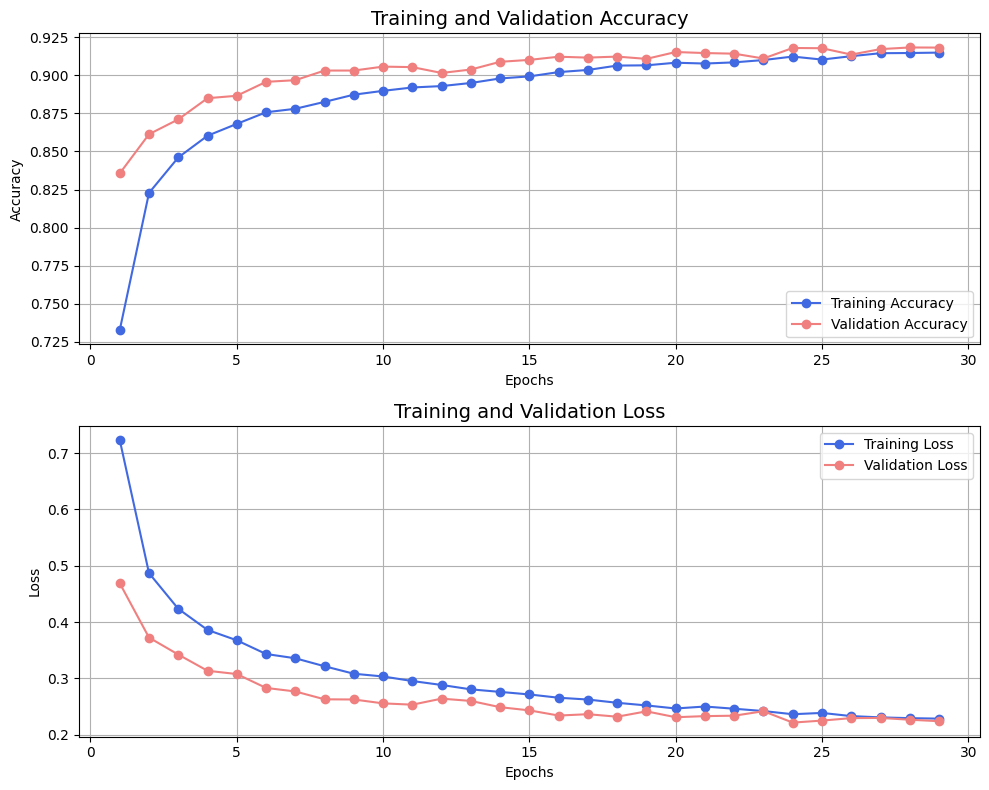

In [ ]:


plot_history(history)


In [ ]:
# Generate predictions for the test set using the trained CNN model
predictions = model2.predict(x_test_reshaped)

# Get the predicted class for each test sample by finding the index of the highest predicted probability
predicted_classes = predictions.argmax(axis=1)

# Create a DataFrame to compare the true labels with the predicted labels
results_df = pd.DataFrame({
    'True Label': y_test,              # True labels from the test set
    'Predicted Label': predicted_classes  # Predicted labels from the model
})

# Display the first few rows of the DataFrame to view the comparison
results_df.head()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,True Label,Predicted Label
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


# Evaluation :

In [ ]:
# Evaluate the trained CNN model on the reshaped test dataset
test_loss, test_accuracy = model2.evaluate(x_test_reshaped, y_test)

# Print the test loss and accuracy with four decimal places
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9152 - loss: 0.2359
Test Loss: 0.2347
Test Accuracy: 0.9141


In [ ]:
# Import the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

# Generate a classification report comparing true labels to predicted labels,
# using class names for better readability
report = classification_report(y_test, predicted_classes, target_names=class_names)

# Print the classification report to the console
print(report)


              precision    recall  f1-score   support

 T-shirt/top       0.86      0.87      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.88      0.87      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.85      0.88      0.86      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.77      0.71      0.74      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



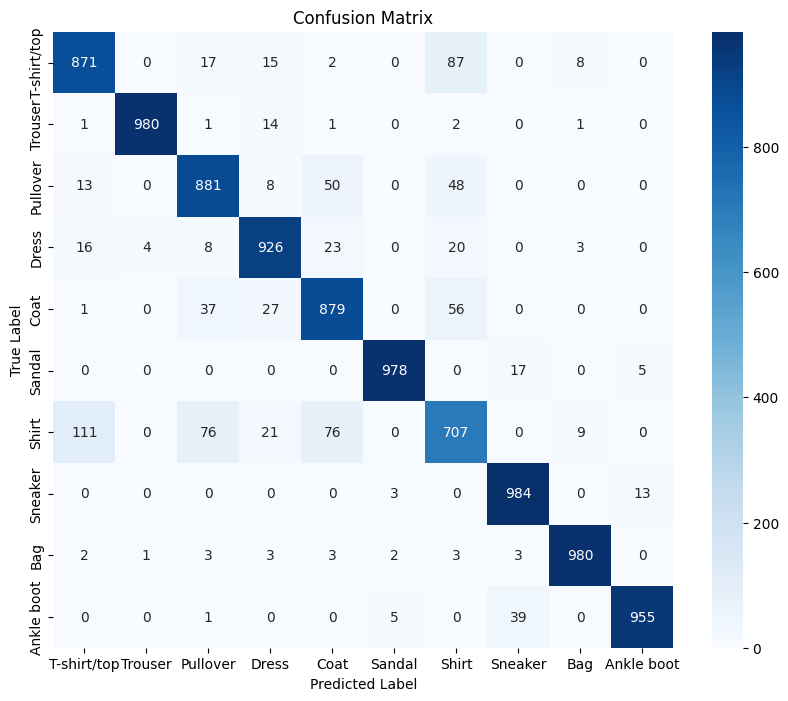

In [ ]:
# Import the confusion_matrix function from sklearn.metrics and seaborn for visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix by comparing true labels with predicted labels
cm = confusion_matrix(results_df['True Label'], results_df['Predicted Label'])

# Set up the figure for the confusion matrix heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the confusion matrix
sns.heatmap(
    cm,                                  # The confusion matrix data
    annot=True,                          # Annotate cells with the counts
    fmt='d',                             # Format for annotations (integer)
    cmap='Blues',                        # Color map for the heatmap
    xticklabels=class_names,             # Class names for the x-axis
    yticklabels=class_names              # Class names for the y-axis
)

# Label the axes and title of the plot
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

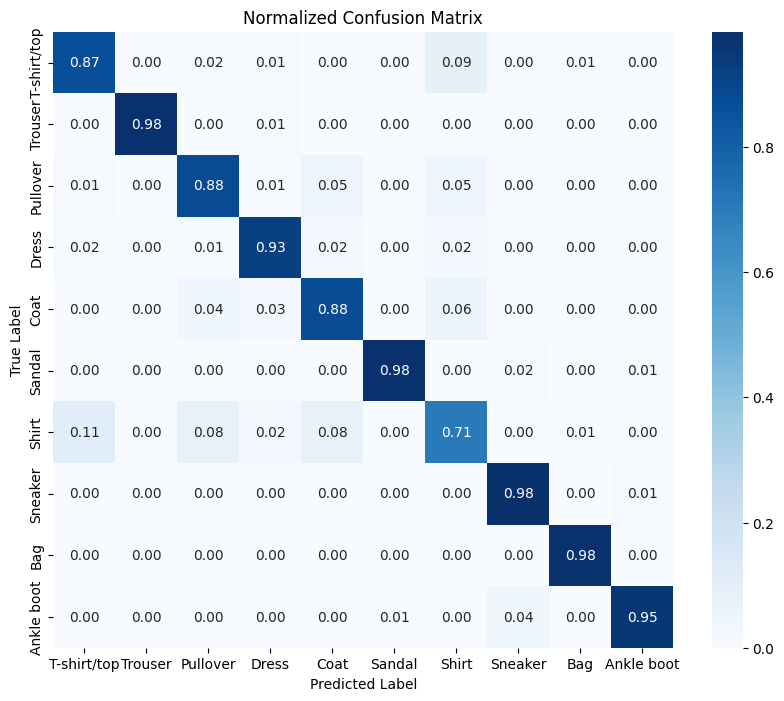

In [ ]:
# Generate the normalized confusion matrix by comparing true labels with predicted labels,
# normalizing the values so that each row sums to 1
cm = confusion_matrix(results_df['True Label'], results_df['Predicted Label'], normalize='true')

# Set up the figure for the normalized confusion matrix heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the normalized confusion matrix
sns.heatmap(
    cm,                                  # The normalized confusion matrix data
    annot=True,                          # Annotate cells with the proportions
    fmt='.2f',                           # Format for annotations (two decimal places)
    cmap='Blues',                        # Color map for the heatmap
    xticklabels=class_names,             # Class names for the x-axis
    yticklabels=class_names              # Class names for the y-axis
)

# Label the axes and title of the plot
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')

# Display the plot
plt.show()


# Look at results :

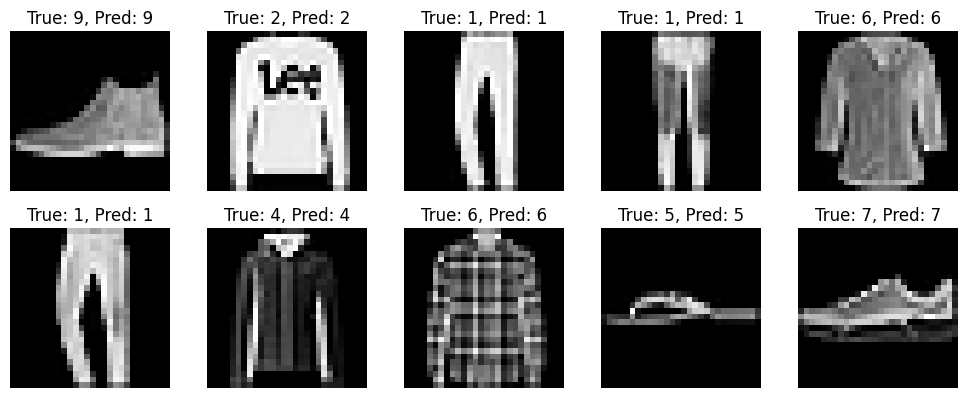

In [ ]:
# Set up the figure for displaying test images
plt.figure(figsize=(10, 10))

# Loop through the first 10 images in the test set
for i in range(10):
    plt.subplot(5, 5, i + 1)  # Create a 5x5 grid for subplots
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Display the image in grayscale
    plt.title(f"True: {test_labels[i]}, Pred: {predicted_classes[i]}")  # Show true and predicted labels
    plt.axis('off')  # Turn off the axis for a cleaner look

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Display the figure
plt.show()
